## FI6161 Block 2
1) Identify 3 stocks
2) Provide analysis using Python + Text
3) Perform Linear Regression and dicuss terms

https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

***

## A. Importing Modules and Dataset

#### Required Pacakges

`pip install yfinance` 

`pip install yahoofinancials`

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # pip install yfinance if necessary
from yahoofinancials import YahooFinancials

Python includes a powerful data handling library -> Panda Dataframes. We import this by using the command `import pandas as pd`. You'll begin to see this library import more frequently throughout this module and course, so I recommend getting familiar with it.

Here is a simple tutorial you can follow to get up to speed! https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

### So to begin, we simply pull stock data from Microsoft, Google & Apple from 2023-02-11 -> 2023-10-25

In [247]:
tickers = ['MSFT', 'GOOGL', 'AAPL']
stocks_df = yf.download(tickers,
                      start='2024-02-11', 
                      end='2024-10-25', 
                      interval = '1d',
                      progress=False)
type(stocks_df)

pandas.core.frame.DataFrame

***

## B. View and graph stock data

Once we've downloaded the stock data, we can view the pandas dataframe using the head method. This command looks at the top `n` rows of our dataframe

***

In [252]:
stocks_df.head(10)

Price                       Adj Close                               Close  \
Ticker                           AAPL       GOOGL        MSFT        AAPL   
Date                                                                        
2024-02-12 00:00:00+00:00  186.475266  147.165588  413.002838  187.149994   
2024-02-13 00:00:00+00:00  184.372864  144.781494  404.111420  185.039993   
2024-02-14 00:00:00+00:00  183.486069  145.579529  408.017303  184.149994   
2024-02-15 00:00:00+00:00  183.197128  142.417358  405.097839  183.860001   
2024-02-16 00:00:00+00:00  181.652695  140.172913  402.606842  182.309998   
2024-02-20 00:00:00+00:00  180.905411  140.771423  401.341400  181.559998   
2024-02-21 00:00:00+00:00  181.662689  142.197891  400.733582  182.320007   
2024-02-22 00:00:00+00:00  183.705292  143.734085  410.169525  184.369995   
2024-02-23 00:00:00+00:00  181.861954  143.604416  408.864258  182.520004   
2024-02-26 00:00:00+00:00  180.506851  137.230209  406.074341  181.160004   

Price                                                    High              \
Ticker                          GOOGL        MSFT        AAPL       GOOGL   
Date                                                                        
2024-02-12 00:00:00+00:00  147.529999  415.260010  188.669998  149.339996   
2024-02-13 00:00:00+00:00  145.139999  406.320007  186.210007  146.669998   
2024-02-14 00:00:00+00:00  145.940002  409.489990  185.529999  146.520004   
2024-02-15 00:00:00+00:00  142.770004  406.559998  184.490005  143.520004   
2024-02-16 00:00:00+00:00  140.520004  404.059998  184.850006  143.190002   
2024-02-20 00:00:00+00:00  141.119995  402.790009  182.429993  142.080002   
2024-02-21 00:00:00+00:00  142.550003  402.179993  182.889999  142.690002   
2024-02-22 00:00:00+00:00  144.089996  411.649994  184.960007  145.000000   
2024-02-23 00:00:00+00:00  143.960007  410.339996  185.039993  144.679993   
2024-02-26 00:00:00+00:00  137.570007  407.540009  182.759995  142.440002   

Price                                         Low                          \
Ticker                           MSFT        AAPL       GOOGL        MSFT   
Date                                                                        
2024-02-12 00:00:00+00:00  420.739990  186.789993  147.369995  414.750000   
2024-02-13 00:00:00+00:00  410.070007  183.509995  143.690002  403.390015   
2024-02-14 00:00:00+00:00  409.839996  182.440002  144.089996  404.570007   
2024-02-15 00:00:00+00:00  409.130005  181.350006  140.460007  404.290009   
2024-02-16 00:00:00+00:00  408.290009  181.669998  140.139999  403.440002   
2024-02-20 00:00:00+00:00  404.489990  180.000000  139.490005  398.010010   
2024-02-21 00:00:00+00:00  402.290009  180.660004  140.679993  397.220001   
2024-02-22 00:00:00+00:00  412.829987  182.460007  142.800003  408.570007   
2024-02-23 00:00:00+00:00  415.859985  182.229996  143.429993  408.970001   
2024-02-26 00:00:00+00:00  412.160004  180.649994  137.389999  407.359985   

Price                            Open                            Volume  \
Ticker                           AAPL       GOOGL        MSFT      AAPL   
Date                                                                      
2024-02-12 00:00:00+00:00  188.419998  148.419998  420.559998  41781900   
2024-02-13 00:00:00+00:00  185.770004  144.919998  404.940002  56529500   
2024-02-14 00:00:00+00:00  185.320007  146.080002  408.070007  54630500   
2024-02-15 00:00:00+00:00  183.550003  143.139999  408.140015  65434500   
2024-02-16 00:00:00+00:00  183.419998  142.990005  407.959991  49701400   
2024-02-20 00:00:00+00:00  181.789993  139.660004  403.239990  53665600   
2024-02-21 00:00:00+00:00  181.940002  141.449997  400.170013  41529700   
2024-02-22 00:00:00+00:00  183.479996  144.929993  410.190002  52292200   
2024-02-23 00:00:00+00:00  185.009995  143.669998  415.670013  45119700   
2024-02-26 00:00:00+00:00  182.240005  142.139999  411.459991  40867400   

Price             

***

Pandas allow us to easily view the data in detail using the .describe() command. There are 176 datapoints or rows in this dataset.

***

In [256]:
stocks_df.describe()

Price    Adj Close                               Close              \
Ticker        AAPL       GOOGL        MSFT        AAPL       GOOGL   
count   178.000000  178.000000  178.000000  178.000000  178.000000   
mean    201.848273  162.698221  421.272301  202.308595  162.955618   
std      23.711504   13.522329   15.794050   23.588050   13.508864   
min     164.405121  131.075424  387.929779  165.000000  131.399994   
25%     180.200470  154.575504  410.659286  180.852501  154.875000   
50%     209.002869  163.436554  418.759995  209.474998  163.504997   
75%     224.495399  172.321896  428.233154  224.937496  172.600002   
max     236.220108  190.926636  466.718781  236.479996  191.179993   

Price                     High                                 Low  \
Ticker        MSFT        AAPL       GOOGL        MSFT        AAPL   
count   178.000000  178.000000  178.000000  178.000000  178.000000   
mean    422.098539  204.151236  164.591404  425.427023  200.340337   
std      15.663888   23.749008   13.549682   15.343208   23.127570   
min     389.329987  166.399994  133.240005  399.890015  164.080002   
25%     411.959999  182.464996  156.392502  415.000000  179.537498   
50%     418.759995  213.570000  165.650002  422.870010  207.004997   
75%     429.137512  226.825001  174.665005  431.642487  223.034996   
max     467.559998  237.490005  191.750000  468.350006  234.449997   

Price                                 Open                          \
Ticker       GOOGL        MSFT        AAPL       GOOGL        MSFT   
count   178.000000  178.000000  178.000000  178.000000  178.000000   
mean    161.384101  418.522079  202.232528  162.970112  422.473258   
std      13.459337   15.553343   23.533838   13.477800   15.385233   
min     130.669998  385.579987  165.350006  131.880005  389.170013   
25%     152.669994  407.817513  181.142506  154.220001  412.057495   
50%     162.625000  416.379990  208.434998  163.825005  420.059998   
75%     171.632496  425.449997  224.902496  173.287495  429.682510   
max     189.029999  464.459991  236.479996  190.309998  467.000000   

Price         Volume                              
Ticker          AAPL         GOOGL          MSFT  
count   1.780000e+02  1.780000e+02  1.780000e+02  
mean    6.009789e+07  2.645544e+07  1.952881e+07  
std     3.432640e+07  1.012964e+07  6.726827e+06  
min     2.818350e+07  1.024210e+07  9.932800e+06  
25%     4.234485e+07  1.995228e+07  1.551095e+07  
50%     5.174865e+07  2.333965e+07  1.761625e+07  
75%     6.586928e+07  2.967318e+07  2.088855e+07  
max     3.186799e+08  6.927370e+07  5.516710e+07

***

Before we plot the data for comparison, we need to normalize the data. 

Can you think of a reason why? Try and plot the data without normalizing first and explain why we need to normalize the data.

***

In [260]:
def normalize_stocks(df):
    """
    Method to normalize stock data. We use the command iloc here to slice through the stock dataset and return the first row. 
    We then divide the dataset by the first row, resetting the inital price to $1 for each stock
    """
    return df/df.iloc[0,:]

***

Pandas allow us to simply plot our data using the plot method. We can title the plot and change the size colour etc. 

You can find more information on plotting here: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

***

<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

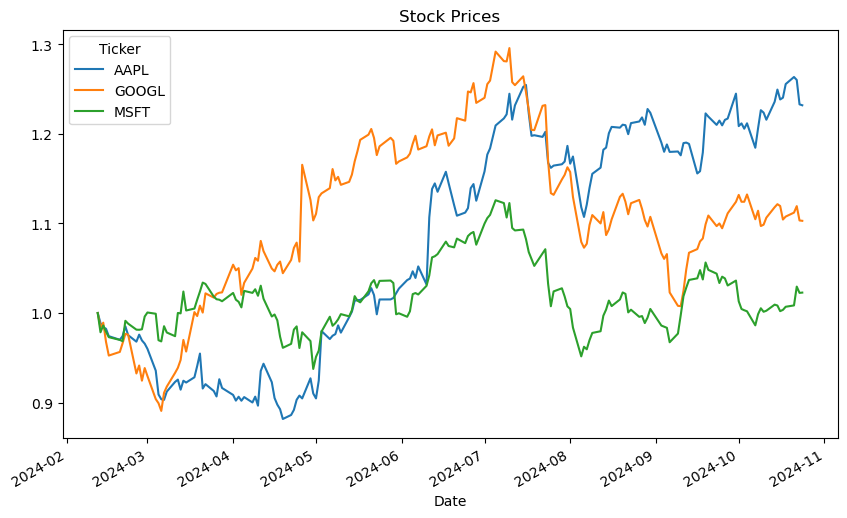

In [264]:
norm_stocks = normalize_stocks(stocks_df)
#norm_stocks.head(10)
norm_stocks['Close'].plot(title="Stock Prices", figsize=(10, 6))

***

The plot above is very simple. We can plot each close price per 'axes' (each stock/ticker in the close price per plot) individually for a deeper insight into our data.

***

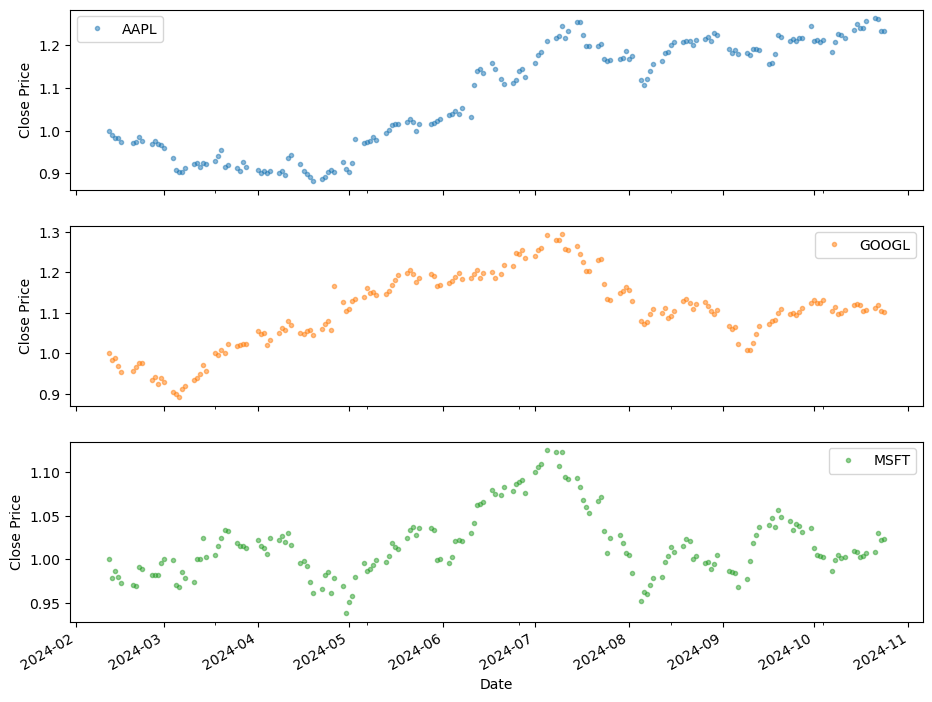

In [268]:
axes = norm_stocks['Close'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Close Price')

***

We can also return just the close prices. Equally, using the same method you can return any column in the panda dataframe. 

**Note**: Our created stock dataframe is a multi-indexed panda dataframe. Don't concern yourself too much with this, we're not expecting you to manipulate the data this way. 

***

In [272]:
close_stocksdf = stocks_df['Close']

In [273]:
close_stocksdf

Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-02-12 00:00:00+00:00,187.149994,147.529999,415.260010
2024-02-13 00:00:00+00:00,185.039993,145.139999,406.320007
2024-02-14 00:00:00+00:00,184.149994,145.940002,409.489990
2024-02-15 00:00:00+00:00,183.860001,142.770004,406.559998
2024-02-16 00:00:00+00:00,182.309998,140.520004,404.059998
...,...,...,...
2024-10-18 00:00:00+00:00,235.000000,163.419998,418.160004
2024-10-21 00:00:00+00:00,236.479996,164.070007,418.779999
2024-10-22 00:00:00+00:00,235.860001,165.139999,427.510010


In [274]:
close_stocksdf.describe()

Ticker,AAPL,GOOGL,MSFT
count,178.000000,178.000000,178.000000
mean,202.308595,162.955618,422.098539
std,23.588050,13.508864,15.663888
min,165.000000,131.399994,389.329987
25%,180.852501,154.875000,411.959999
50%,209.474998,163.504997,418.759995
75%,224.937496,172.600002,429.137512
max,236.479996,191.179993,467.559998


***

## Linear Regression

To begin, we download stock data for Google for a period of a year. Once loaded into a dataframe we have a brief look at the data. Usually, during this step, Analysts and Machine Learning Engineers would perform something called EDA & Data Wrangling. I would not concern yourself with this; for now, be aware that this process exists and is common practice.


In [278]:
stocks_df = yf.download('GOOGL',
                      start='2021-01-01', 
                      end='2021-11-02', 
                      progress=False)

In [279]:
stocks_df.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2021-01-04 00:00:00+00:00,86.093323,86.306503,88.124496,85.357002,88.000000,37324000
2021-01-05 00:00:00+00:00,86.787598,87.002502,87.341499,85.845001,86.254501,20360000
2021-01-06 00:00:00+00:00,85.931213,86.143997,87.198502,84.805000,85.013000,46588000
2021-01-07 00:00:00+00:00,88.497871,88.717003,88.890999,86.337997,86.337997,41936000
2021-01-08 00:00:00+00:00,89.669464,89.891502,89.968002,88.060997,88.858002,35484000
2021-01-11 00:00:00+00:00,87.597595,87.814499,89.219002,87.607002,88.850998,34796000
2021-01-12 00:00:00+00:00,86.656921,86.871498,88.394997,85.819000,87.267998,29528000
2021-01-13 00:00:00+00:00,87.146713,87.362503,87.819504,86.365997,86.365997,23432000


In [280]:
print(stocks_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2021-01-04 00:00:00+00:00 to 2021-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  210 non-null    float64
 1   (Close, GOOGL)      210 non-null    float64
 2   (High, GOOGL)       210 non-null    float64
 3   (Low, GOOGL)        210 non-null    float64
 4   (Open, GOOGL)       210 non-null    float64
 5   (Volume, GOOGL)     210 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.5 KB
None


The assumption here is that the data is clean and ready for use. Our task is to predict the stock's close price; this can be useful when deciding whether to buy, sell, or hold shares.

We create a new dataframe and assign it just the value of close stock values for ease of use.

In [282]:
close_df = stocks_df[['Close']]

In [283]:
close_df.head(10)

Price,Close
Ticker,GOOGL
Date,
2021-01-04 00:00:00+00:00,86.306503
2021-01-05 00:00:00+00:00,87.002502
2021-01-06 00:00:00+00:00,86.143997
2021-01-07 00:00:00+00:00,88.717003
2021-01-08 00:00:00+00:00,89.891502
2021-01-11 00:00:00+00:00,87.814499
2021-01-12 00:00:00+00:00,86.871498
2021-01-13 00:00:00+00:00,87.362503


Graphing helps visualize the `trend` in the data. What we mean by this is the pattern found in our time series data. In this case, we have an upwards trend, so the stock data value is increasing over a year. There are minor fluctuations, but once we view the rolling average/exponential weighted mean `(EWM)` /exponential moving average `(EMA)` this trend will become clearer

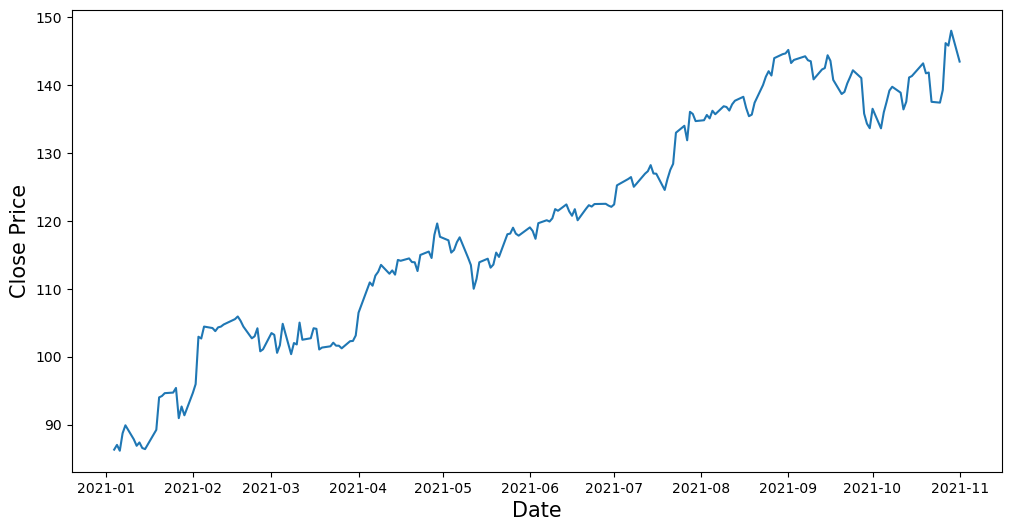

In [285]:
plt.figure(figsize = (12,6))
plt.plot(close_df)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.show()

`pip install pandas-ta`

There are two almost identical methods to calculate the Rolling Avg. 

For `Method 1` below, we use an advanced Python package pandas_ta to calculate the EMA. 

In [288]:
import pandas_ta as ta

close_df.ta.ema(close='Close', length=10)

Price,Close
Ticker,GOOGL
Date,
2021-01-04 00:00:00+00:00,86.306503
2021-01-05 00:00:00+00:00,87.002502
2021-01-06 00:00:00+00:00,86.143997
2021-01-07 00:00:00+00:00,88.717003
2021-01-08 00:00:00+00:00,89.891502
...,...
2021-10-26 00:00:00+00:00,139.308502
2021-10-27 00:00:00+00:00,146.217499


For `Method 2`, we use pandas EWA method over 10 days. 

In [290]:
close_df['Close'].ewm(span=10,min_periods=10,adjust=False,ignore_na=False).mean()

Ticker,GOOGL
Date,
2021-01-04 00:00:00+00:00,NaN
2021-01-05 00:00:00+00:00,NaN
2021-01-06 00:00:00+00:00,NaN
2021-01-07 00:00:00+00:00,NaN
2021-01-08 00:00:00+00:00,NaN
...,...
2021-10-26 00:00:00+00:00,139.628832
2021-10-27 00:00:00+00:00,140.826771
2021-10-28 00:00:00+00:00,141.739904


For proof, I've shown that both methods return the same values. I will stick with pandas_ta method, as **append** the values to our close_df dataframe. We now have two columns, close prices and the 10 day rolling avg.

Collin note: for the code below, I had to replace this as it was not correctly storing ema_10 in the dataframe. I manually calculated ema_10 and stored it in the dataframe using .loc (documentation found here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [354]:
ema_10 = close_df[('Close', 'GOOGL')].ewm(span=10, adjust=False).mean()
close_df.loc[:, ('EMA_10', 'GOOGL')] = ema_10
close_df.head(11)

Price,Close,EMA_10
Ticker,GOOGL,GOOGL
Date,,
2021-01-19 00:00:00+00:00,89.223503,89.223503
2021-01-20 00:00:00+00:00,94.003502,90.092594
2021-01-21 00:00:00+00:00,94.207497,90.840758
2021-01-22 00:00:00+00:00,94.627998,91.529347
2021-01-25 00:00:00+00:00,94.713997,92.108374
2021-01-26 00:00:00+00:00,95.397499,92.706397
2021-01-27 00:00:00+00:00,90.946999,92.386506
2021-01-28 00:00:00+00:00,92.660004,92.436233


In [356]:
close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2021-01-19 00:00:00+00:00 to 2021-11-01 00:00:00+00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   200 non-null    float64
 1   (EMA_10, GOOGL)  200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


Note that the first 10 entries are empty. There are numerous ways to deal with this; however, I'm just going to drop them for simplicity. 

In [358]:
close_df = close_df.iloc[10:]
close_df.head(20)

Price,Close,EMA_10
Ticker,GOOGL,GOOGL
Date,,
2021-02-02 00:00:00+00:00,95.956001,93.276015
2021-02-03 00:00:00+00:00,102.944000,95.033830
2021-02-04 00:00:00+00:00,102.681503,96.424316
2021-02-05 00:00:00+00:00,104.441498,97.881986
2021-02-08 00:00:00+00:00,104.225998,99.035442
2021-02-09 00:00:00+00:00,103.769501,99.896180
2021-02-10 00:00:00+00:00,104.323997,100.701238
2021-02-11 00:00:00+00:00,104.437500,101.380558


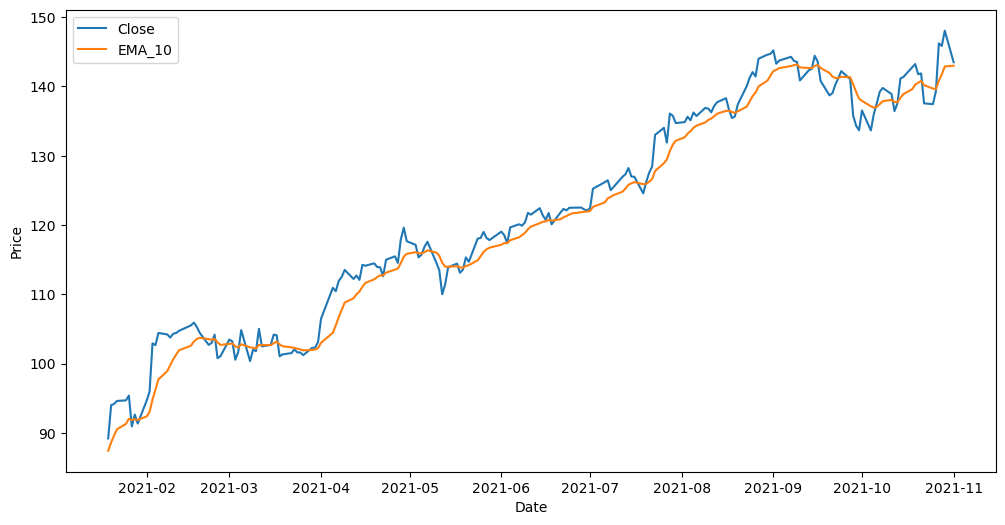

In [296]:
plt.figure(figsize = (12,6))
plt.plot(close_df)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close','EMA_10'])

Okay, so now we have plotted the rolling avg to better describe the `trend` in the data. Now we can easily see that that the trend is increasing. However, there is another reason for calculating the rolling avg. The Linear Regression model finds it difficult to predict prices from the time and stock. This issue is also known as `autocorrelation`. Linear Regression assumes there is a linear relationship between dependent and independent values. In this case, time-series data is highly autocorrelated meaning this assumption is broken. However, all is not lost; as we have calculated the rolling avg, we now have a more suitable independent variable. 

https://towardsdatascience.com/simulation-of-the-linear-regression-model-with-autocorrelated-errors-b5606186f406

In [298]:
from sklearn.model_selection import train_test_split

The next step is to split the train and test data. This is a fundamental part of Machine Learning, and there is a lot of theory behind it which you will learn in detail in your next module. For now, I want you to know that it's an important step in the process.

In [300]:
print(close_df.columns)
print(close_df.head)
y_train, y_test, x_train, x_test = train_test_split(close_df[['Close']], close_df[['EMA_10']], test_size=.2)

MultiIndex([( 'Close', 'GOOGL'),
            ('EMA_10', 'GOOGL')],
           names=['Price', 'Ticker'])
<bound method NDFrame.head of Price                           Close      EMA_10
Ticker                          GOOGL       GOOGL
Date                                             
2021-01-19 00:00:00+00:00   89.223503   87.446785
2021-01-20 00:00:00+00:00   94.003502   88.638915
2021-01-21 00:00:00+00:00   94.207497   89.651384
2021-01-22 00:00:00+00:00   94.627998   90.556223
2021-01-25 00:00:00+00:00   94.713997   91.312182
...                               ...         ...
2021-10-26 00:00:00+00:00  139.308502  139.628832
2021-10-27 00:00:00+00:00  146.217499  140.826771
2021-10-28 00:00:00+00:00  145.848999  141.739904
2021-10-29 00:00:00+00:00  148.046005  142.886468
2021-11-01 00:00:00+00:00  143.496994  142.997472

[200 rows x 2 columns]>


In [301]:
x_train

Price,EMA_10
Ticker,GOOGL
Date,
2021-06-21 00:00:00+00:00,120.849991
2021-08-23 00:00:00+00:00,137.084154
2021-07-16 00:00:00+00:00,126.201364
2021-03-04 00:00:00+00:00,102.351139
2021-03-15 00:00:00+00:00,102.690068
...,...
2021-02-04 00:00:00+00:00,96.264428
2021-07-01 00:00:00+00:00,122.046175


In [302]:
x_test

Price,EMA_10
Ticker,GOOGL
Date,
2021-02-25 00:00:00+00:00,103.080083
2021-10-06 00:00:00+00:00,137.059049
2021-09-14 00:00:00+00:00,142.650129
2021-01-22 00:00:00+00:00,90.556223
2021-07-14 00:00:00+00:00,125.814014
2021-06-01 00:00:00+00:00,117.167989
2021-10-12 00:00:00+00:00,137.771614
2021-07-08 00:00:00+00:00,124.074070


In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### ${Y}_i = {\beta}_0 + {\beta}_1 {X}_{i} $

So here is the Linear Regression equation and how we use it in learning. From here, we `train` on our dataset, building our model. Once this is complete, we ask our model to predict the avg stock price.

In [306]:
linearReg = LinearRegression()

In [307]:
linearReg.fit(x_train, y_train)

LinearRegression()

In [308]:
y_pred = linearReg.predict(x_test)

Here, we can view how our model performed. The Mean Absolute error indicates that the model is doing well but not perfect, while our R2 score indicates a good fit. 

In [310]:
print("Model Coefficients:", linearReg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Model Coefficients: [[0.97552146]]
Mean Absolute Error: 1.5518888963568636
R2 Score: 0.9848157240413226


In [311]:
x_test['EMA_10'].values

array([[103.08008268],
       [137.0590487 ],
       [142.65012906],
       [ 90.5562233 ],
       [125.81401363],
       [117.16798916],
       [137.77161383],
       [124.07407039],
       [141.95426847],
       [137.45285914],
       [142.97365185],
       [141.21592297],
       [121.69985593],
       [103.17221966],
       [142.94705456],
       [ 92.38853979],
       [115.85062893],
       [140.01429129],
       [142.2136245 ],
       [112.49771342],
       [125.27557232],
       [123.85853076],
       [125.90620769],
       [134.81607403],
       [131.60555993],
       [118.54462274],
       [116.36117655],
       [141.39758464],
       [132.17300385],
       [137.92794403],
       [ 99.80860809],
       [138.90514191],
       [137.73713872],
       [102.04946457],
       [107.7701697 ],
       [122.63005185],
       [ 89.6513844 ],
       [140.26888001],
       [125.96135233],
       [142.88646754]])

In [1]:
plt.figure(figsize = (10,8))
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test.values,y_pred, color='black')
plt.title('Best Fit Line')
plt.savefig('BestFitLine.png', 

SyntaxError: incomplete input (3097520075.py, line 5)

The final plot shows exactly this, with a model that is performing well but could be improved. 

In the previous example, we use contemporaneous values of the dependend and independent variables in the regression. That is, we use EWM, which is calculated using prices observed at time $(i, i-1, i-1,..., i-9)$, to predict price at time $i$. In reality we can observe only past data to predict the price at the next period.
### ${Y}_i = {\beta}_0 + {\beta}_1 {X}_{i-1} $
For example, you can use EWM calculated using 10 prices observed at times $(i-1, i-2, i-3,..., i-10)$ to predict at stock price at time $i$. 
For this you can create lags and leads of columns in our dataframe. See: https://www.educative.io/answers/how-to-create-lags-and-leads-of-a-column-in-a-pandas-dataframe 

## Your Work

I am going to choose Meta, Airbnb, and Netflix as my three stocks, with tickers META, ABNB, NFLX, respectively.

In [365]:
tickers = ['META', 'ABNB', 'NFLX'] # Establishing the tickers we are going to use
stocks_df = yf.download( # downloading from yahoofinance module
    tickers, # loading the tickers
    start='2024-02-11', # start date from example above
    end = '2024-10-25', # end date from example above
    interval = '1d', # 1d intervals
    progress=False) # don't need to display progress bar, but if you want to for large data sets you can

In [367]:
stocks_df.head(10)

Price                       Adj Close                               Close  \
Ticker                           ABNB        META        NFLX        ABNB   
Date                                                                        
2024-02-12 00:00:00+00:00  153.800003  467.492432  557.849976  153.800003   
2024-02-13 00:00:00+00:00  150.820007  458.738800  554.520020  150.820007   
2024-02-14 00:00:00+00:00  148.199997  471.859283  579.330017  148.199997   
2024-02-15 00:00:00+00:00  157.690002  482.577026  593.460022  157.690002   
2024-02-16 00:00:00+00:00  152.509995  471.899170  583.950012  152.509995   
2024-02-20 00:00:00+00:00  148.149994  470.333862  575.130005  148.149994   
2024-02-21 00:00:00+00:00  149.240005  467.120148  573.349976  149.240005   
2024-02-22 00:00:00+00:00  155.259995  485.184967  588.469971  155.259995   
2024-02-23 00:00:00+00:00  152.660004  483.089050  583.559998  152.660004   
2024-02-26 00:00:00+00:00  149.270004  480.803497  587.650024  149.270004   

Price                                                    High              \
Ticker                           META        NFLX        ABNB        META   
Date                                                                        
2024-02-12 00:00:00+00:00  468.899994  557.849976  157.345001  479.149994   
2024-02-13 00:00:00+00:00  460.119995  554.520020  153.020004  467.890015   
2024-02-14 00:00:00+00:00  473.279999  579.330017  149.529999  474.109985   
2024-02-15 00:00:00+00:00  484.029999  593.460022  158.270004  488.619995   
2024-02-16 00:00:00+00:00  473.320007  583.950012  156.100006  478.959991   
2024-02-20 00:00:00+00:00  471.750000  575.130005  150.679993  476.179993   
2024-02-21 00:00:00+00:00  468.029999  573.349976  149.259995  469.000000   
2024-02-22 00:00:00+00:00  486.130005  588.469971  155.699997  489.989990   
2024-02-23 00:00:00+00:00  484.029999  583.559998  155.300003  494.359985   
2024-02-26 00:00:00+00:00  481.739990  587.650024  150.179993  486.140015   

Price                                         Low                          \
Ticker                           NFLX        ABNB        META        NFLX   
Date                                                                        
2024-02-12 00:00:00+00:00  568.440002  148.339996  466.579987  557.000000   
2024-02-13 00:00:00+00:00  559.200012  148.580002  455.089996  549.000000   
2024-02-14 00:00:00+00:00  581.250000  142.570007  466.089996  564.340027   
2024-02-15 00:00:00+00:00  593.770020  148.750000  472.220001  580.320007   
2024-02-16 00:00:00+00:00  597.000000  151.779999  469.209991  577.460022   
2024-02-20 00:00:00+00:00  586.000000  145.880005  466.559998  569.659973   
2024-02-21 00:00:00+00:00  575.780029  145.395996  461.790009  567.320007   
2024-02-22 00:00:00+00:00  590.849976  150.264999  476.059998  578.890015   
2024-02-23 00:00:00+00:00  592.429993  150.824997  482.350006  579.820007   
2024-02-26 00:00:00+00:00  590.750000  148.559998  480.600006  583.270020   

Price                            Open                            Volume  \
Ticker                           ABNB        META        NFLX      ABNB   
Date                                                                      
2024-02-12 00:00:00+00:00  148.679993  468.190002  560.359985   7909500   
2024-02-13 00:00:00+00:00  149.210007  456.869995  550.799988  11801700   
2024-02-14 00:00:00+00:00  146.160004  467.929993  567.260010  16021800   
2024-02-15 00:00:00+00:00  148.910004  475.279999  581.909973  11923000   
2024-02-16 00:00:00+00:00  156.100006  478.109985  596.950012   6518300   
2024-02-20 00:00:00+00:00  150.309998  469.720001  580.179993   5229700   
2024-02-21 00:00:00+00:00  145.979996  466.500000  573.510010   4570800   
2024-02-22 00:00:00+00:00  151.020004  480.239990  582.750000   6115000   
2024-02-23 00:00:00+00:00  153.270004  488.049988  586.400024   4851100   
2024-02-26 00:00:00+00:00  149.960007  483.470001  583.559998   5277900   

Price             

In [369]:
stocks_df.describe() # View data with extra info courtesy of pandas library

Price    Adj Close                               Close              \
Ticker        ABNB        META        NFLX        ABNB        META   
count   178.000000  178.000000  178.000000  178.000000  178.000000   
mean    143.671573  506.026229  646.446517  143.671573  506.669438   
std      16.052174   36.825206   48.083007   16.052174   36.550620   
min     113.010002  429.333771  550.640015  113.010002  430.170013   
25%     131.254993  480.651291  613.137512  131.254993  481.587509   
50%     147.065002  500.308838  641.544983  147.065002  500.985001   
75%     157.267502  523.625732  685.337494  157.267502  524.254990   
max     168.179993  595.940002  772.070007  168.179993  595.940002   

Price                     High                                 Low  \
Ticker        NFLX        ABNB        META        NFLX        ABNB   
count   178.000000  178.000000  178.000000  178.000000  178.000000   
mean    646.446517  145.384623  512.853595  653.757246  141.990062   
std      48.083007   16.255012   36.614255   48.012718   15.846932   
min     550.640015  115.500000  439.619995  558.609985  110.379997   
25%     613.137512  132.297497  486.849991  621.047485  129.729996   
50%     641.544983  148.897499  507.699997  649.944977  145.505005   
75%     685.337494  159.509998  530.525009  688.854996  154.522499   
max     772.070007  170.100006  602.950012  773.000000  167.320007   

Price                                 Open                          \
Ticker        META        NFLX        ABNB        META        NFLX   
count   178.000000  178.000000  178.000000  178.000000  178.000000   
mean    500.200393  638.557641  143.640904  506.637751  646.153876   
std      37.020900   47.815982   16.030818   37.402944   48.495346   
min     414.500000  542.010010  112.440002  421.399994  547.840027   
25%     475.057495  606.925018  131.357498  479.042503  614.324997   
50%     495.190002  632.634979  147.014999  502.324997  641.005005   
75%     515.587494  676.699982  157.174999  521.747498  683.072510   
max     589.960022  761.119995  169.690002  598.219971  765.760010   

Price         Volume                              
Ticker          ABNB          META          NFLX  
count   1.780000e+02  1.780000e+02  1.780000e+02  
mean    4.453844e+06  1.419022e+07  3.352829e+06  
std     2.813727e+06  7.586482e+06  1.899119e+06  
min     1.725600e+06  6.005600e+06  1.354200e+06  
25%     3.136100e+06  1.019268e+07  2.394175e+06  
50%     3.803350e+06  1.209495e+07  2.938300e+06  
75%     4.765825e+06  1.581840e+07  3.599400e+06  
max     2.902790e+07  8.289070e+07  1.642500e+07

We are going to run a brief experiment by plotting this data without normalizing it, then comparing it to the graph after normalization.

<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

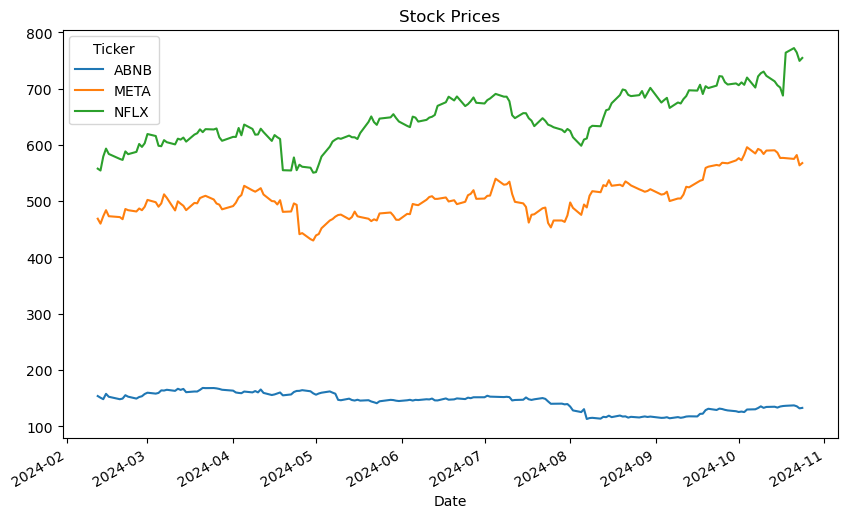

In [374]:
stocks_df['Close'].plot(title="Stock Prices", figsize=(10, 6)) # plotting close values of the stock of the pre-normalized data

<Axes: title={'center': 'Normalized Stock Prices'}, xlabel='Date'>

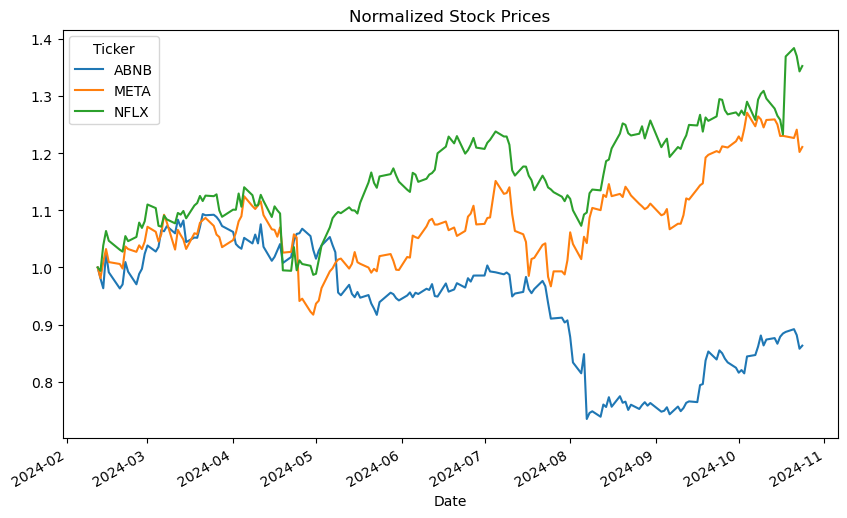

In [376]:
# Now to normalize the data

def normalize(df):
    return df/df.iloc[0,:]

normalized = normalize(stocks_df)
normalized['Close'].plot(title='Normalized Stock Prices', figsize=(10, 6))

So, to better identify trends and to help analyze patterns between data sets, it is clear that using the normalized data set is better. While this is not the "true" value of the stocks, the trends are now visually comparable across the 3 data sets. 

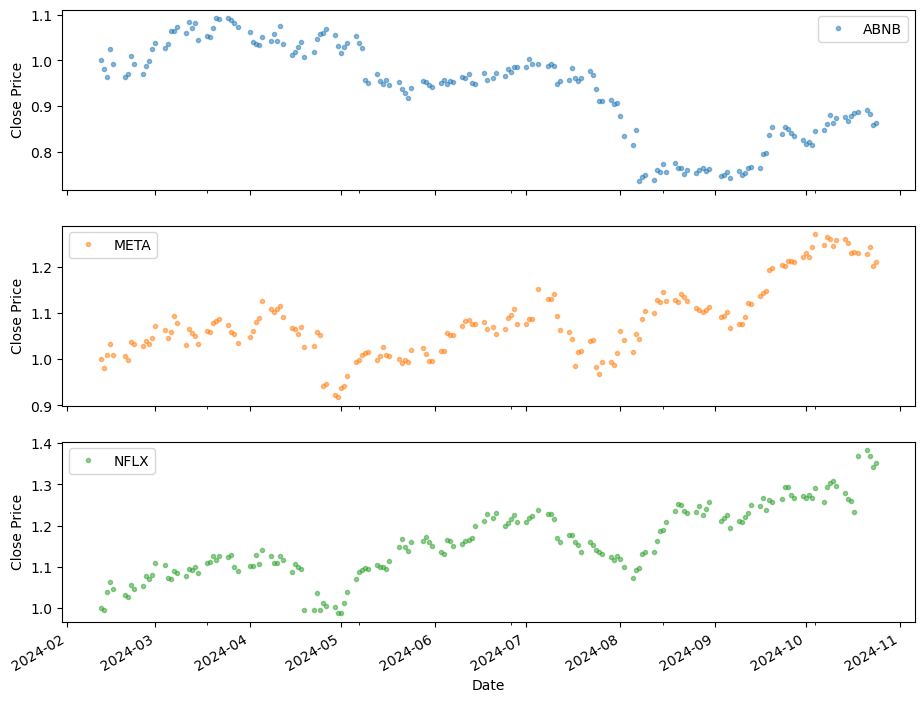

In [379]:
axes = normalized['Close'].plot(marker='.', alpha = 0.5, linestyle = 'none', figsize = (11, 9), subplots=True)
for x in axes:
    x.set_ylabel('Close Price')

In [381]:
close_stocksdf = stocks_df['Close']
close_stocksdf

Ticker,ABNB,META,NFLX
Date,,,
2024-02-12 00:00:00+00:00,153.800003,468.899994,557.849976
2024-02-13 00:00:00+00:00,150.820007,460.119995,554.520020
2024-02-14 00:00:00+00:00,148.199997,473.279999,579.330017
2024-02-15 00:00:00+00:00,157.690002,484.029999,593.460022
2024-02-16 00:00:00+00:00,152.509995,473.320007,583.950012
...,...,...,...
2024-10-18 00:00:00+00:00,136.449997,576.469971,763.890015
2024-10-21 00:00:00+00:00,137.190002,575.159973,772.070007
2024-10-22 00:00:00+00:00,135.589996,582.010010,764.239990


In [383]:
close_stocksdf.describe()

Ticker,ABNB,META,NFLX
count,178.000000,178.000000,178.000000
mean,143.671573,506.669438,646.446517
std,16.052174,36.550620,48.083007
min,113.010002,430.170013,550.640015
25%,131.254993,481.587509,613.137512
50%,147.065002,500.985001,641.544983
75%,157.267502,524.254990,685.337494
max,168.179993,595.940002,772.070007


In [411]:
airbnb = stocks_df.xs('ABNB', level='Ticker', axis=1) # We want to look specifically at Airbnb data
airbnb.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-02-12 00:00:00+00:00,153.800003,153.800003,157.345001,148.339996,148.679993,7909500
2024-02-13 00:00:00+00:00,150.820007,150.820007,153.020004,148.580002,149.210007,11801700
2024-02-14 00:00:00+00:00,148.199997,148.199997,149.529999,142.570007,146.160004,16021800
2024-02-15 00:00:00+00:00,157.690002,157.690002,158.270004,148.750000,148.910004,11923000
2024-02-16 00:00:00+00:00,152.509995,152.509995,156.100006,151.779999,156.100006,6518300
2024-02-20 00:00:00+00:00,148.149994,148.149994,150.679993,145.880005,150.309998,5229700
2024-02-21 00:00:00+00:00,149.240005,149.240005,149.259995,145.395996,145.979996,4570800
2024-02-22 00:00:00+00:00,155.259995,155.259995,155.699997,150.264999,151.020004,6115000
2024-02-23 00:00:00+00:00,152.660004,152.660004,155.300003,150.824997,153.270004,4851100


In [413]:
airbnb_close = airbnb['Close'] # loading in the close prices for Airbnb, saving in new dataframe airbnb_close
airbnb_close.head(10)

Date
2024-02-12 00:00:00+00:00    153.800003
2024-02-13 00:00:00+00:00    150.820007
2024-02-14 00:00:00+00:00    148.199997
2024-02-15 00:00:00+00:00    157.690002
2024-02-16 00:00:00+00:00    152.509995
2024-02-20 00:00:00+00:00    148.149994
2024-02-21 00:00:00+00:00    149.240005
2024-02-22 00:00:00+00:00    155.259995
2024-02-23 00:00:00+00:00    152.660004
2024-02-26 00:00:00+00:00    149.270004
Name: Close, dtype: float64

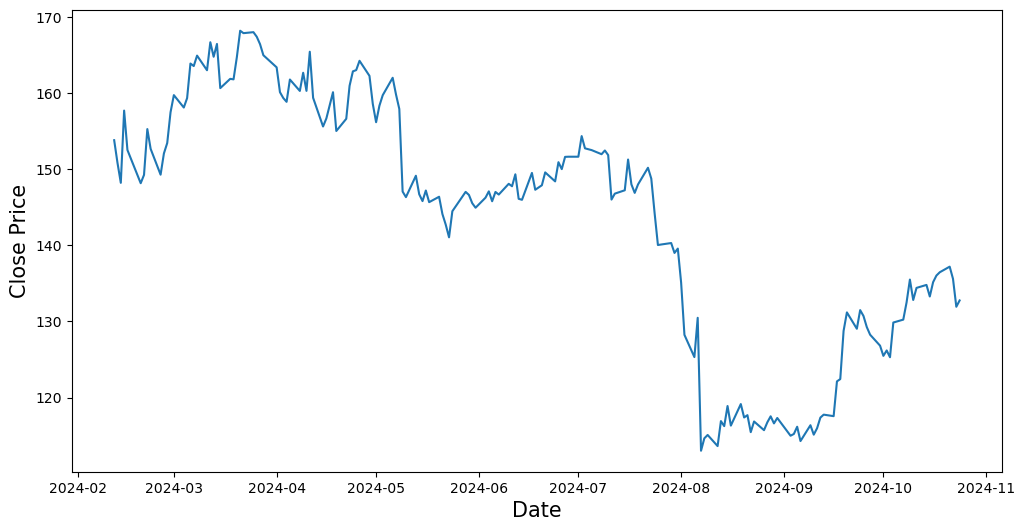

In [415]:
plt.figure(figsize = (12,6))
plt.plot(airbnb_close)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.show()

In [425]:
abnb_ewa = airbnb_close.ewm(span=10, adjust=False).mean()

Date
2024-02-12 00:00:00+00:00    153.800003
2024-02-13 00:00:00+00:00    153.258186
2024-02-14 00:00:00+00:00    152.338515
2024-02-15 00:00:00+00:00    153.311513
2024-02-16 00:00:00+00:00    153.165782
                                ...    
2024-10-18 00:00:00+00:00    133.793122
2024-10-21 00:00:00+00:00    134.410736
2024-10-22 00:00:00+00:00    134.625147
2024-10-23 00:00:00+00:00    134.133302
2024-10-24 00:00:00+00:00    133.881792
Name: Close, Length: 178, dtype: float64


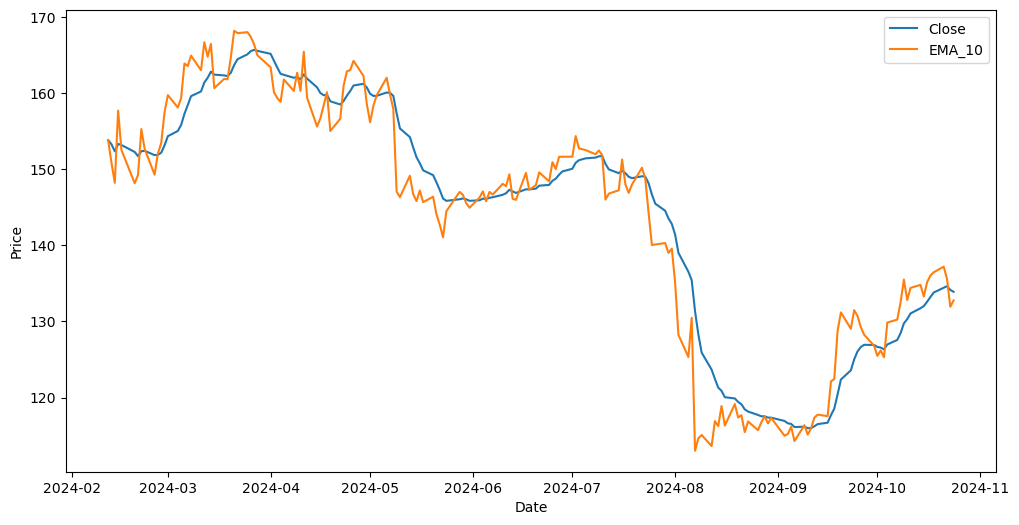

In [429]:
plt.figure(figsize = (12,6))
plt.plot(abnb_ewa)
plt.plot(airbnb_close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close','EMA_10'])